In [1]:
!pip install PyGithub pandas matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


No GitHub Token provided. Proceeding with unauthenticated requests (lower rate limit).
Using unauthenticated GitHub API (rate limits are much lower: ~60 requests/hour).
Successfully fetched user: SakibAhmedShuva

--- GitHub Public Profile Summary for SakibAhmedShuva ---
Name: Sakib Ahmed
Bio: Machine Learning Engineer @llamamind.io
Location: N/A
Public Repos (total, including forks): 113
Account Created: 2023-02-24 18:43:40+00:00
Followers: 1
Following: 9

Fetching public repositories for SakibAhmedShuva...
Found 113 non-fork public repositories.

--- List of Original Public Repositories (Top 15 by stars, then by name) ---
                                                 name  stars         language                 last_push
COCO-JSON-to-YOLO-Segmentation-Converter-and-Splitter      1 Jupyter Notebook 2025-03-15 18:00:28+00:00
                  CVAT-Segmentation-to-YOLO-Converter      1 Jupyter Notebook 2024-11-06 18:38:37+00:00
              YOLO-Segmentation-Annotation-Visualizer    

C:\Users\user\AppData\Local\Temp\ipykernel_12076\2149127721.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index[:10], y=language_counts.values[:10], palette="viridis")


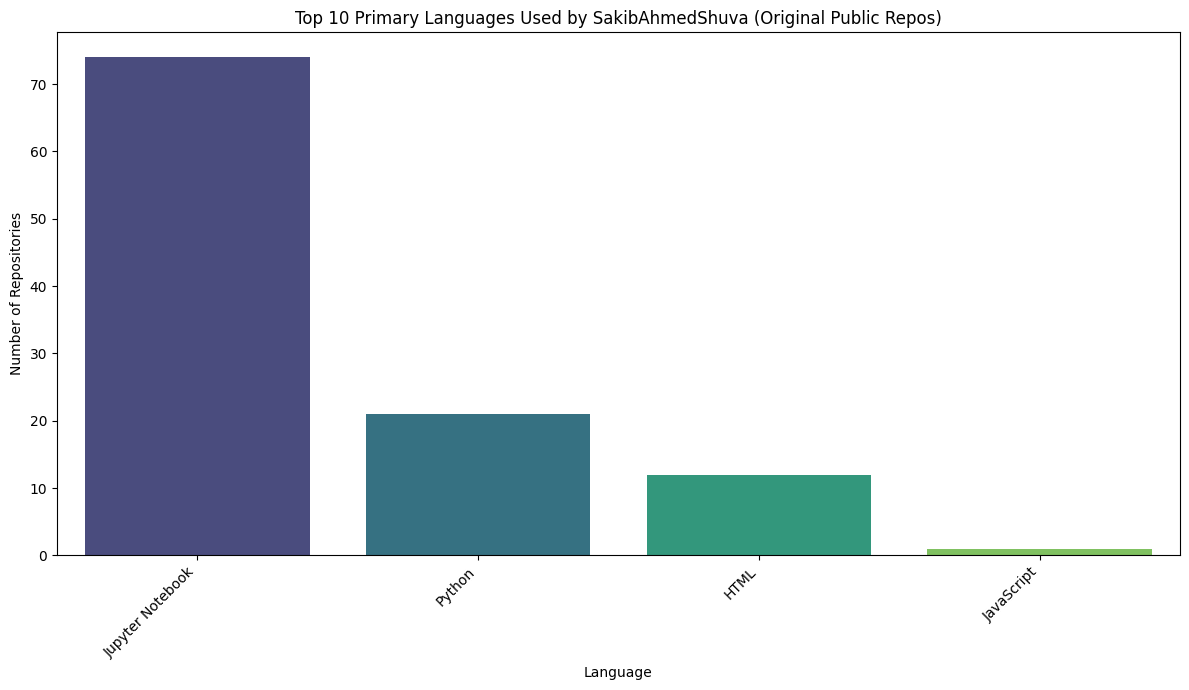


--- Most Recently Pushed-to Original Public Repositories (Top 10) ---
                                  name                 last_push  stars
             Exploring-Qwen-LLM-Models 2025-05-23 16:09:35+00:00      0
                   OCR-with-LLM-Models 2025-05-23 16:09:19+00:00      0
PostgreSQL-Database-Downloader-Toolkit 2025-05-22 18:13:26+00:00      0
            Exploring-Llama-3.2-Models 2025-05-22 16:29:17+00:00      0
   exploring-phi-4-gguf-with-llama-cpp 2025-05-22 16:25:10+00:00      0
                             Surya-OCR 2025-05-21 03:45:48+00:00      0
    Mistral-OCR-Based-Invoice-Analyzer 2025-05-19 17:42:06+00:00      0
                 Local-LLM-Chat-Engine 2025-05-19 17:37:47+00:00      0
          Exploring-Various-LLM-Models 2025-05-17 16:58:06+00:00      0
     Label-Studio-JSON-Dataset-Toolkit 2025-05-17 15:02:44+00:00      0

--- Analysis Complete ---


In [2]:
#@title GitHub Public Repository Analyzer
# Install necessary libraries (if not done in a separate cell)
# !pip install PyGithub pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from github import Github, GithubException
from collections import Counter
import getpass # For optional token input

# --- Configuration via Colab Form ---
GITHUB_USERNAME = "SakibAhmedShuva"  # @param {type:"string"}
# It's highly recommended to use a GitHub Personal Access Token (PAT)
# to avoid low API rate limits (60 requests/hour unauthenticated vs 5000/hour authenticated).
# If you don't provide one, the script will try to run unauthenticated.
# You can generate a PAT here: https://github.com/settings/tokens (select 'public_repo' scope)
USE_TOKEN_PROMPT = True #@param {type:"boolean"}
# OPTIONAL_GITHUB_TOKEN = "" #@param {type:"string"} # Alternative: direct input if getpass fails

TOKEN = None
if USE_TOKEN_PROMPT:
    try:
        TOKEN = getpass.getpass('Enter your GitHub Personal Access Token (optional, press Enter to skip): ')
        if not TOKEN: # If user just presses Enter
            TOKEN = None
            print("No GitHub Token provided. Proceeding with unauthenticated requests (lower rate limit).")
    except Exception as e:
        print(f"Note: getpass might not work in all Colab environments directly: {e}")
        print("You can manually set OPTIONAL_GITHUB_TOKEN in the code if needed, or uncheck USE_TOKEN_PROMPT.")
        TOKEN = None # Fallback if getpass fails
# elif OPTIONAL_GITHUB_TOKEN:
#    TOKEN = OPTIONAL_GITHUB_TOKEN

# --- Initialize PyGithub ---
try:
    if TOKEN:
        g = Github(TOKEN)
        print("Authenticated with GitHub API.")
    else:
        g = Github() # Unauthenticated
        print("Using unauthenticated GitHub API (rate limits are much lower: ~60 requests/hour).")

    user = g.get_user(GITHUB_USERNAME)
    print(f"Successfully fetched user: {user.login}")
except GithubException as e:
    print(f"Error connecting to GitHub or fetching user '{GITHUB_USERNAME}': {e.status} {e.data.get('message', '')}")
    print("Please check the username and your PAT (if provided) and its permissions.")
    user = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    user = None

# --- Helper Functions ---
def get_public_repo_data(user_obj):
    """Fetches public repository data for the user."""
    if not user_obj:
        return []
    repos_data = []
    print(f"\nFetching public repositories for {user_obj.login}...")
    try:
        # For public repos, user.get_repos() works.
        # It will only return public repos unless authenticated user IS the GITHUB_USERNAME
        # and the token has 'repo' scope for private repos.
        # Since we focus on "open repos only", this is fine.
        for repo in user_obj.get_repos(type='public'): # Explicitly ask for public
            if not repo.fork: # We are interested in original repositories
                repos_data.append({
                    "name": repo.name,
                    "stars": repo.stargazers_count,
                    "forks_count": repo.forks_count,
                    "watchers": repo.watchers_count,
                    "language": repo.language, # Primary language
                    "created_at": repo.created_at,
                    "last_push": repo.pushed_at,
                    "url": repo.html_url,
                    "description": repo.description if repo.description else "N/A",
                })
        print(f"Found {len(repos_data)} non-fork public repositories.")
    except GithubException as e:
        print(f"GitHub API Error fetching repositories: {e.status} {e.data.get('message', '')}")
        if e.status == 403 and "rate limit exceeded" in e.data.get('message','').lower():
            print("RATE LIMIT EXCEEDED. Please use a GitHub Personal Access Token or wait an hour.")
    except Exception as e:
        print(f"Error fetching repositories: {e}")
    return repos_data

# --- Main Analysis (only run if user object was fetched) ---
if user:
    print(f"\n--- GitHub Public Profile Summary for {user.login} ---")

    # 1. Basic User Info
    print(f"Name: {user.name if user.name else 'N/A'}")
    print(f"Bio: {user.bio if user.bio else 'N/A'}")
    print(f"Location: {user.location if user.location else 'N/A'}")
    print(f"Public Repos (total, including forks): {user.public_repos}")
    print(f"Account Created: {user.created_at}")

    # 2. Followers
    print(f"Followers: {user.followers}")
    print(f"Following: {user.following}")

    # --- Repository Analysis (Original Public Repos) ---
    public_repos_data = get_public_repo_data(user)
    repos_df = pd.DataFrame(public_repos_data)

    if not repos_df.empty:
        # 3. List of all (original, public) repos
        print("\n--- List of Original Public Repositories (Top 15 by stars, then by name) ---")
        print(repos_df[['name', 'stars', 'language', 'last_push']]
              .sort_values(by=["stars", "name"], ascending=[False, True])
              .head(15)
              .to_string(index=False))

        # 4. Total Stars (on original, public repos)
        total_stars = repos_df['stars'].sum()
        print(f"\n--- Total Stars on Original Public Repositories ---")
        print(f"Total Stars: {total_stars}")

        # 5. Repositories with Stars Summary (Top 10 most starred original, public)
        print("\n--- Top 10 Most Starred Original Public Repositories ---")
        top_starred_repos = repos_df.sort_values(by='stars', ascending=False)
        print(top_starred_repos[['name', 'stars', 'language', 'description']]
              .head(10)
              .to_string(index=False))

        # 6. Language Distribution (primary language of original, public repos)
        print("\n--- Primary Language Distribution in Original Public Repositories ---")
        language_counts = repos_df['language'].value_counts()
        if not language_counts.empty and language_counts.index[0] is not None: # Check if there's any language data
            print(language_counts.head(10))

            # Plot language distribution
            plt.figure(figsize=(12, 7))
            sns.barplot(x=language_counts.index[:10], y=language_counts.values[:10], palette="viridis")
            plt.title(f'Top 10 Primary Languages Used by {user.login} (Original Public Repos)')
            plt.xlabel('Language')
            plt.ylabel('Number of Repositories')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No primary language data found for original public repositories.")

        # 7. Most Active Repositories (by last push date, for original, public repos)
        print("\n--- Most Recently Pushed-to Original Public Repositories (Top 10) ---")
        # Ensure 'last_push' is datetime for correct sorting if not already
        repos_df['last_push'] = pd.to_datetime(repos_df['last_push'])
        active_repos = repos_df.sort_values(by='last_push', ascending=False)
        print(active_repos[['name', 'last_push', 'stars']]
              .head(10)
              .to_string(index=False))

    else:
        print(f"\nNo non-fork public repositories found for {user.login} or an error occurred during fetch.")
else:
    print("\nSkipping analysis due to GitHub connection/user fetch error.")

print("\n--- Analysis Complete ---")

In [5]:
#@title List All Original Public Repositories (and optionally save to CSV)

# --- Configuration via Colab Form ---
SAVE_TO_CSV = True  # @param {type:"boolean"}

if 'repos_df' in locals() and not repos_df.empty and 'user' in locals() and user:
    print(f"\n--- Full List of Original Public Repositories for {user.login} ---")
    print(f"Total original public repositories found: {len(repos_df)}\n")

    # Select and reorder columns for better readability
    repos_to_print_df = repos_df[[
        'name',
        'stars',
        'language',
        'forks_count',
        'watchers',
        'last_push',
        'created_at',
        'description',
        'url'
    ]].sort_values(by='stars', ascending=False)

    # Pandas display options to show more content
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth', 80)
    pd.set_option('display.width', 1000)

    if not repos_to_print_df.empty:
        print(repos_to_print_df.to_string(index=False))

        if SAVE_TO_CSV:
            csv_filename = f"{user.login}_public_repos.csv"
            try:
                repos_to_print_df.to_csv(csv_filename, index=False, encoding='utf-8')
                print(f"\nSUCCESS: Repository list saved to '{csv_filename}'")
                print("You can find it in the Colab file browser on the left sidebar and download it.")
            except Exception as e:
                print(f"\nERROR: Could not save to CSV file '{csv_filename}'. Error: {e}")
    else:
        print("No original public repositories were found in the previous analysis to display.")

    # Reset pandas display options to default if desired (optional)
    # pd.reset_option('display.max_rows')
    # pd.reset_option('display.max_colwidth')
    # pd.reset_option('display.width')

elif 'user' in locals() and user:
    print(f"No repository data (repos_df) found from the previous analysis for {user.login}.")
    print("Please run the main analysis cell first.")
else:
    print("No user or repository data found. Please run the main analysis cell first.")


--- Full List of Original Public Repositories for SakibAhmedShuva ---
Total original public repositories found: 113

                                                  name  stars         language  forks_count  watchers                 last_push                created_at                                                                                                                                                                                                                                                                               description                                                                                       url
               YOLO-Segmentation-Annotation-Visualizer      1 Jupyter Notebook            0         1 2024-11-10 17:50:54+00:00 2024-11-09 17:29:37+00:00                                                                                                                                                                                                           